In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# First Approach: Predicting Movie Status Based on Numerical and Categorical Features

In [5]:
# Read movie data
df_movie = pd.read_csv('rotten_tomatoes_movies.csv')
df_movie.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [7]:
# Check data distribution
df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


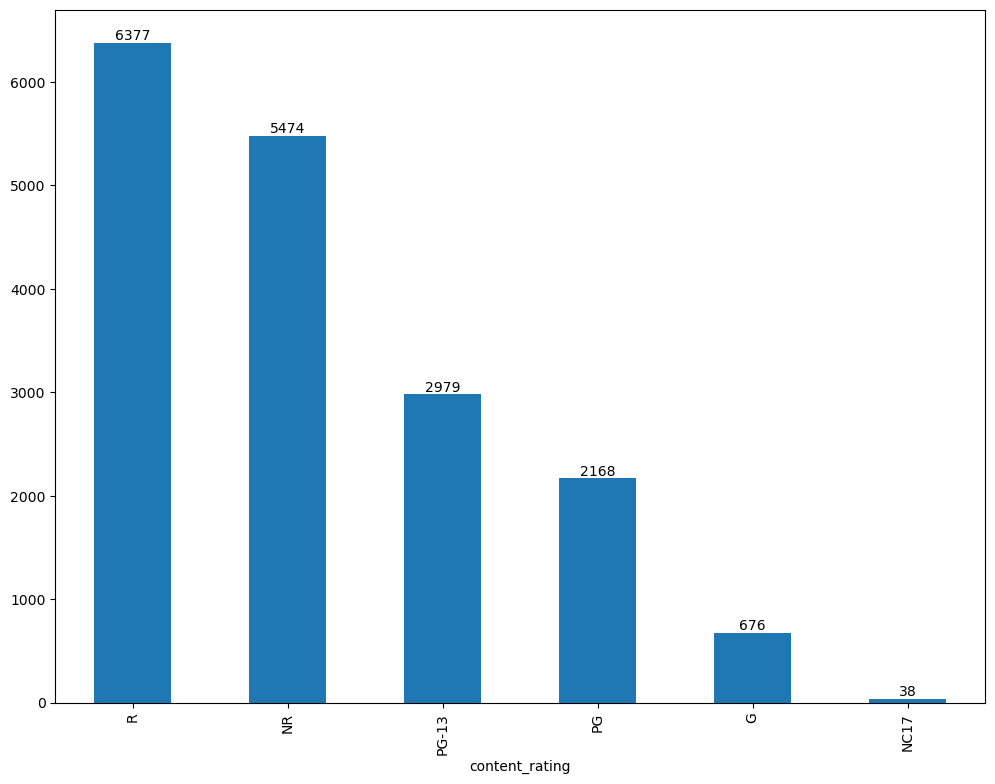

In [27]:
# Data preprocessing I: content_rating feature
print(f'Content Rating category: {df_movie.content_rating.unique()}')
filename = 'Distribution of content_rating feature'

# Visualize the distribution of each category in content_rating feature
ax = df_movie.content_rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])
plt.savefig(f"graphs/{filename}.png")


In [37]:
# One hot encoding content_rating feature
content_rating = pd.get_dummies(df_movie['content_rating']).astype('int')
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


Audience status category: ['Spilled' 'Upright' nan]


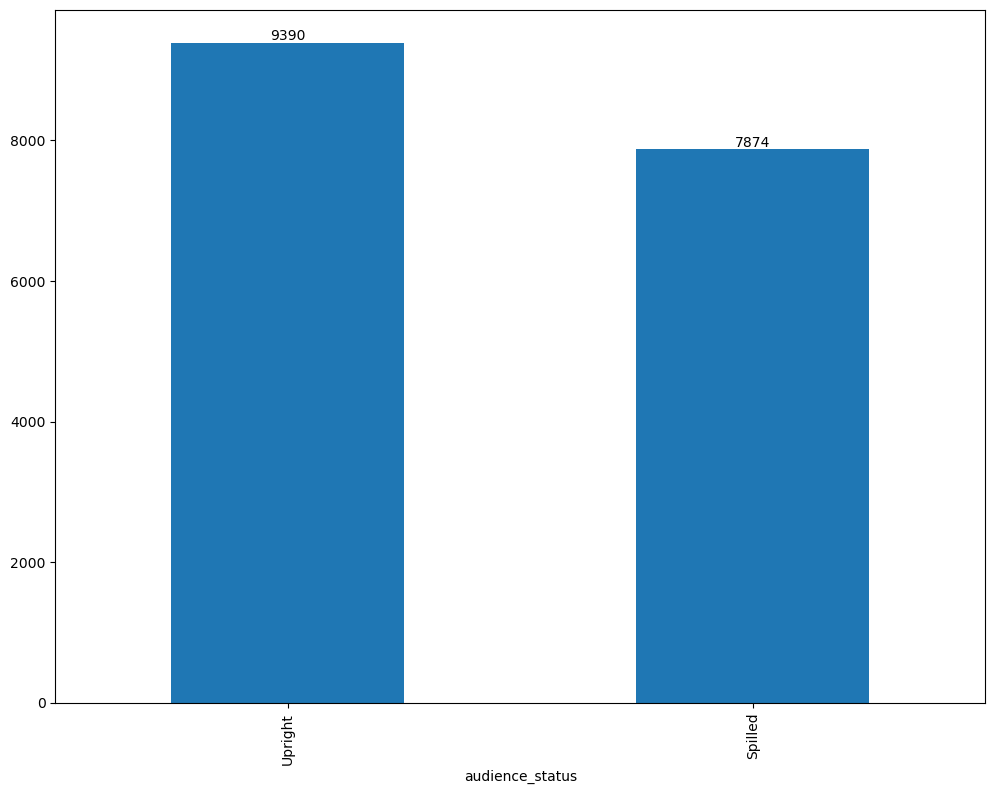

In [41]:
# Data preprocessing II: audience_status feature
print(f'Audience status category: {df_movie.audience_status.unique()}')
filename = 'Distribution of audience_status feature'

# Visualize the distribution of each category
ax = df_movie.audience_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])
plt.savefig(f"graphs/{filename}.png")

In [43]:
# Encode audience status feature with ordinal encoding
audience_status = pd.DataFrame(df_movie.audience_status.replace(['Spilled','Upright'],[0,1]))
audience_status.head()

C:\Users\mouni\AppData\Local\Temp\ipykernel_10480\667868556.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  audience_status = pd.DataFrame(df_movie.audience_status.replace(['Spilled','Upright'],[0,1]))


,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [45]:
# Data preprocessing III: tomatometer_status feature
# Encode tomatometer status feature with ordinal encoding
tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status

C:\Users\mouni\AppData\Local\Temp\ipykernel_10480\4249108029.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))


,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
17707,0.0
17708,2.0
17709,1.0
17710,1.0


In [47]:
# Combine all of the features together into one dataframe
df_feature = pd.concat([df_movie[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']]
                        , content_rating, audience_status, tomatometer_status], axis=1).dropna()
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0


In [49]:
# Check the distribution of feature dataframe
df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


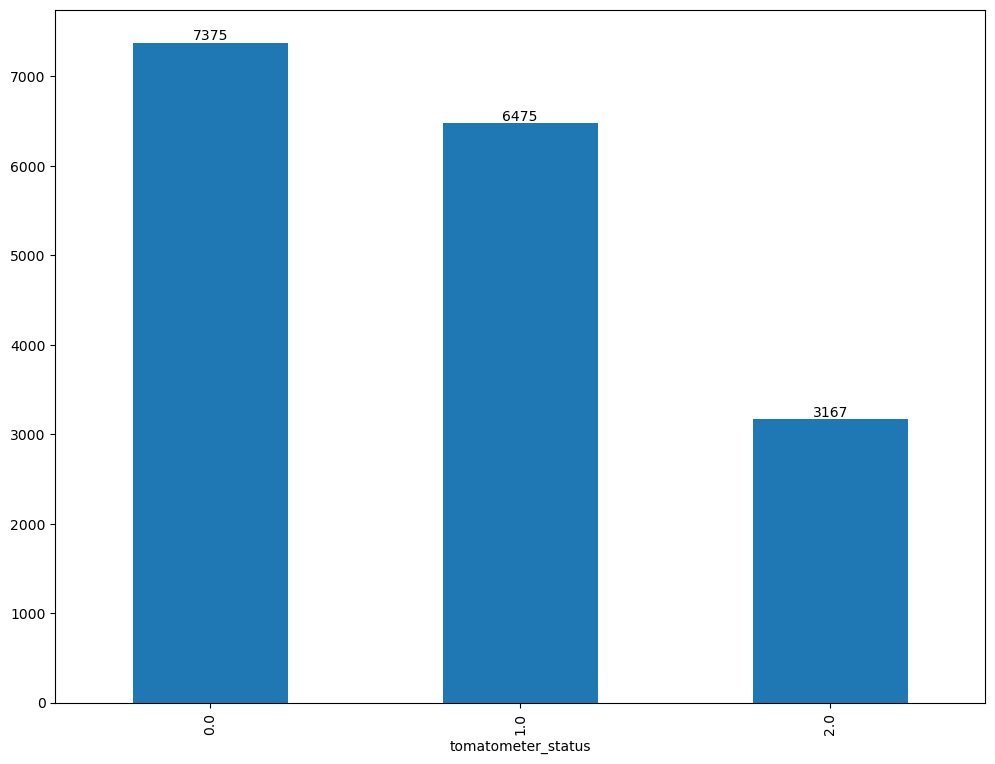

In [51]:
# Check class distribution of our target variable:tomatometer_status  
filename = 'Distribution of tomatometer_status feature'

ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])
plt.savefig(f"graphs/{filename}.png")

In [53]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1), df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


## Decision Tree Classifier: Constrained to Three Leaf Nodes

Accuracy: 0.9462397179788484
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.97      0.88      0.93      1286
         2.0       0.80      0.95      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.94      0.93      3404
weighted avg       0.95      0.95      0.95      3404



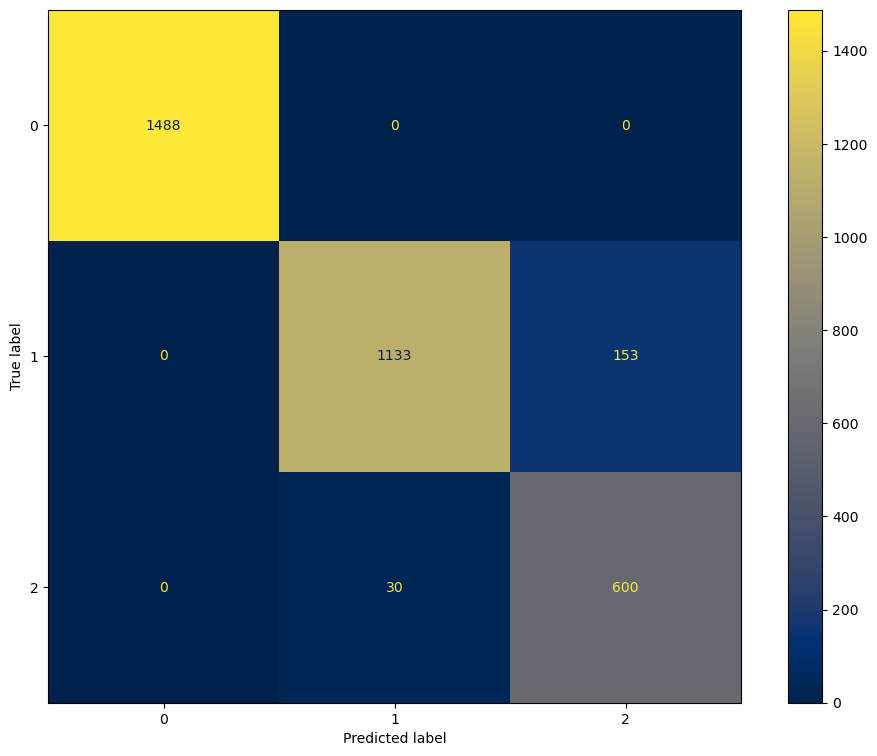

In [64]:
# Instantiate Decision Tree Classifier with max leaf nodes = 3
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

# Predict the test data with the trained tree classifier
y_predict = tree_3_leaf.predict(X_test)

# Print accuracy and classification report on test data
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create the confusion matrix display object
# Automatically handle display labels based on the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Create a figure and axis with a custom size
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the confusion matrix
disp.plot(cmap='cividis', ax=ax)

# Show the plot
plt.show()

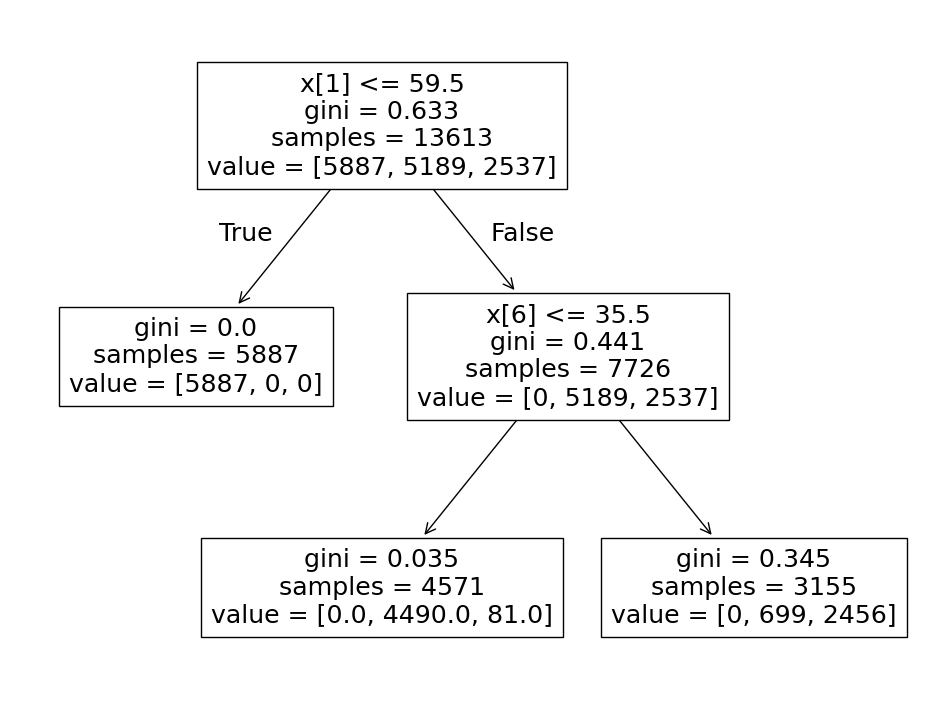

In [66]:
# Visualize decision logic of decision tree model
fig, ax = plt.subplots(figsize=(12, 9))
plot_tree(tree_3_leaf, ax= ax)
plt.show()

## Decision Tree Classifier: Unconstrained

Accuracy: 0.9900117508813161
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.97      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



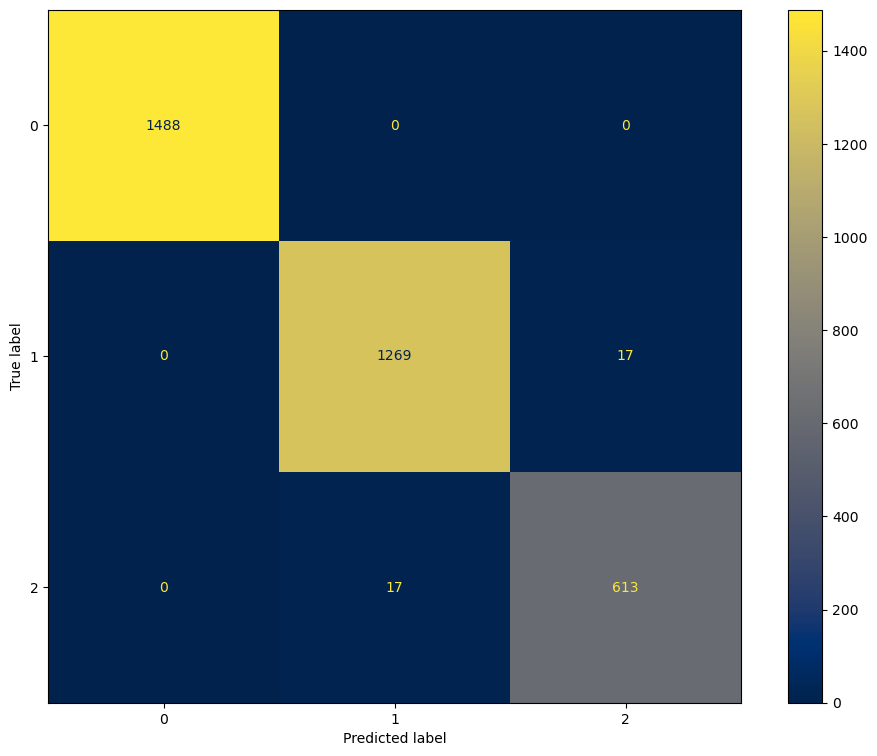

In [71]:
# Instantiate Decision Tree Classifier with default hyperparameter settings
tree = DecisionTreeClassifier(random_state=2)

# Train the classifier on the training data
tree.fit(X_train, y_train)

# Predict the test data with the trained tree classifier
y_predict = tree.predict(X_test)

# Print accuracy and classification report on test data
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Create a figure and axis with a custom size
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the confusion matrix
disp.plot(cmap='cividis', ax=ax)

# Show the plot
plt.show()


## Random Forest Classifier

Accuracy: 0.9908930669800236
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



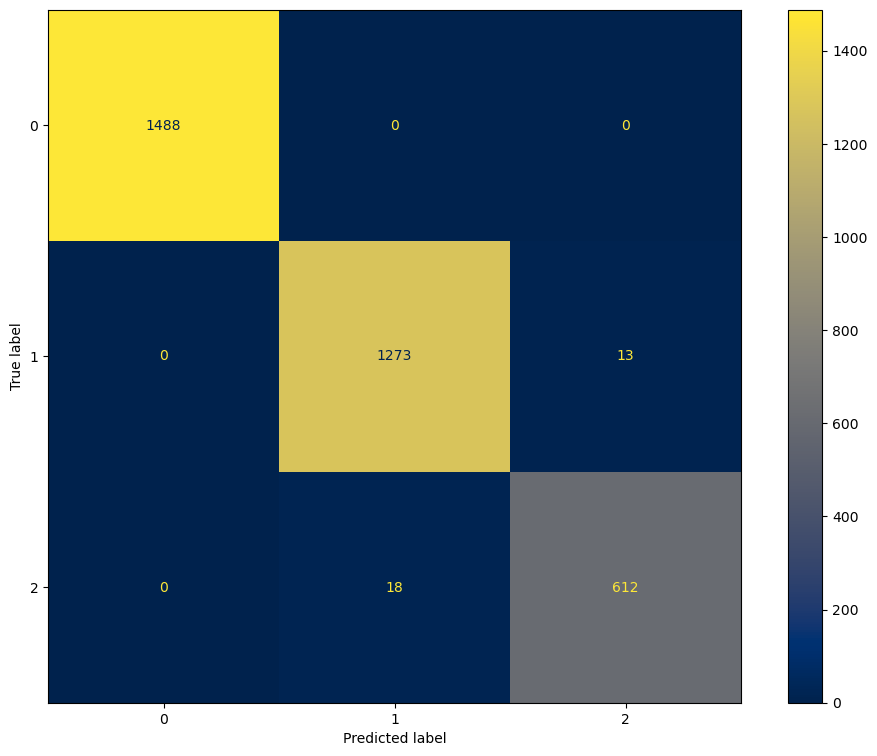

In [74]:
# Instantiate Random Forest Classifier
rf = RandomForestClassifier(random_state=2)

# Train Random Forest Classifier on training data
rf.fit(X_train, y_train)

# Predict test data with trained model
y_predict = rf.predict(X_test)

# Print accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Create a figure and axis with a custom size
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the confusion matrix
disp.plot(cmap='cividis', ax=ax)

# Show the plot
plt.show()


runtime = 0.0061295693480302215
tomatometer_rating = 0.4751025864067028
tomatometer_count = 0.09895425717250429
audience_rating = 0.05389101976402856
audience_count = 0.016289896938110955
tomatometer_top_critics_count = 0.03605739578773787
tomatometer_fresh_critics_count = 0.14158242877024638
tomatometer_rotten_critics_count = 0.1314030539462201
G = 0.00029824734631526663
NC17 = 1.7090610669550172e-05
NR = 0.008710731204885382
PG = 0.0005762363713202383
PG-13 = 0.002531466583040527
R = 0.0022318936876928337
audience_status = 0.026224126062495294


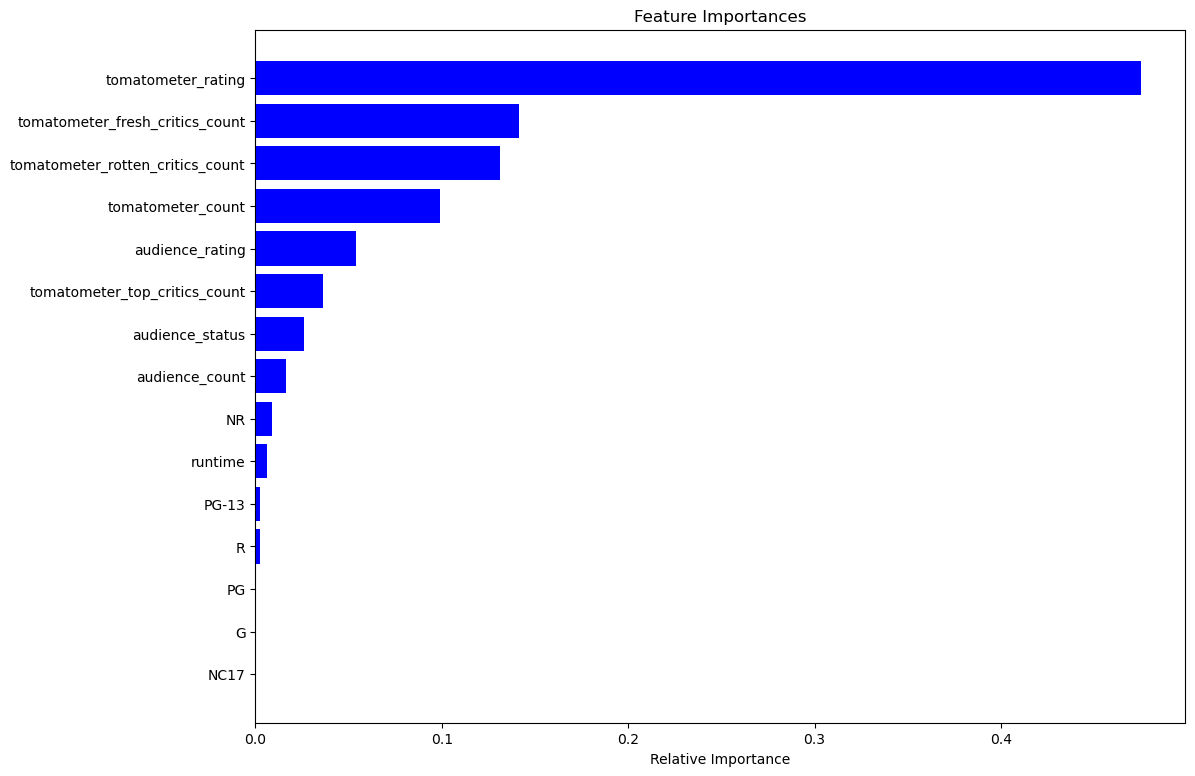

In [84]:
# Get the feature importance
filename = 'Feature Importance'
feature_importance = rf.feature_importances_

# Print feature importance
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

# Visualize feature from the most important to the least important
indices = np.argsort(feature_importance)

plt.figure(figsize=(12,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig(f"graphs/{filename}.png")
plt.show()

## Random Forest Classifier with Feature Selection


In [87]:
# Split data into train and test after feature selection
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status', 'NR', 'runtime', 'PG-13', 'R', 'PG','G', 'NC17'], axis=1),df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


Accuracy: 0.9917743830787309
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



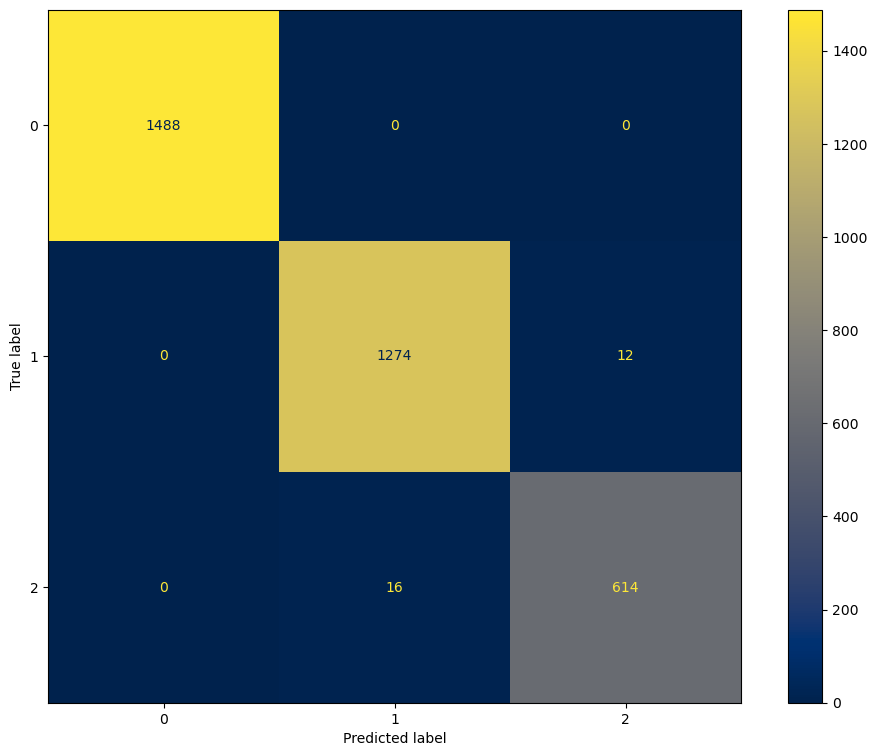

In [89]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=2)

# Train Random Forest on the training data after feature selection
rf.fit(X_train, y_train)

# Predict the trained model on the test data after feature selection
y_predict = rf.predict(X_test)

# Print the accuracy score and the classification report
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Create a figure and axis with a custom size
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the confusion matrix
disp.plot(cmap='cividis', ax=ax)

# Show the plot
plt.show()


## Weighted Random Forest Classifier with Feature Selection

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

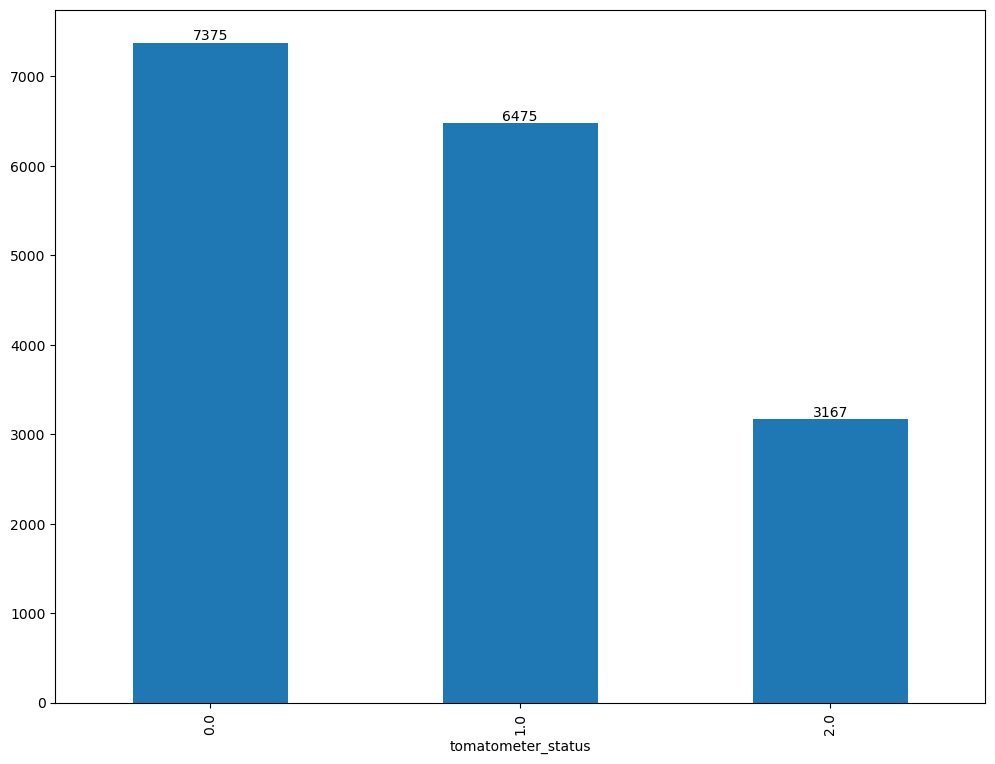

In [94]:
# Check class distribution of target variable once more
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [96]:
# Compute class weight
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature.tomatometer_status), 
                      y = df_feature.tomatometer_status.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

Accuracy: 0.9926556991774383
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



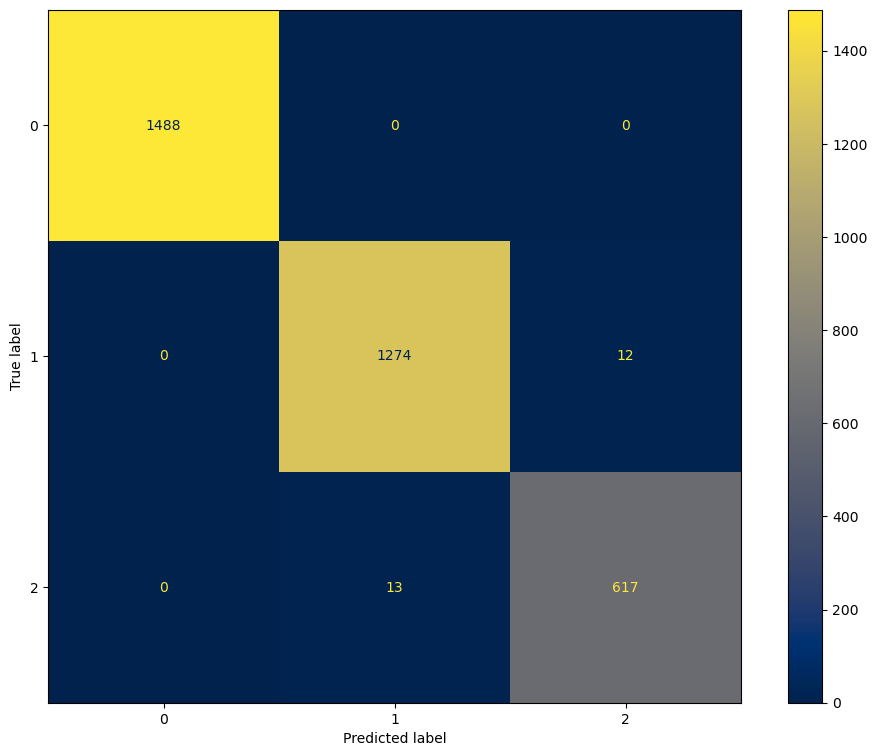

In [98]:
# Initialize Random Forest model with weight information
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

# Train the model on the training data
rf_weighted.fit(X_train, y_train)

# Predict the test data with the trained model
y_predict = rf_weighted.predict(X_test)

# Print accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Create a figure and axis with a custom size
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the confusion matrix
disp.plot(cmap='cividis', ax=ax)

# Show the plot
plt.show()


# Second Approach: Predicting Movie Status Based on Review Sentiment

In [101]:
# Read critics dataframe
df_critics = pd.read_csv('rotten_tomatoes_critic_reviews_50k.csv')
df_critics.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [103]:
# Merge critics dataframe with movie dataframe
df_merged = df_critics.merge(df_movie, how='inner', on=['rotten_tomatoes_link'])
df_merged = df_merged[['rotten_tomatoes_link', 'movie_title', 'review_content', 'review_type', 'tomatometer_status']]

In [105]:
df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


In [107]:
# Drop entries with missing reviews
df_merged = df_merged.dropna(subset=['review_content'])

[Text(0, 0, '25276'), Text(0, 0, '15919')]

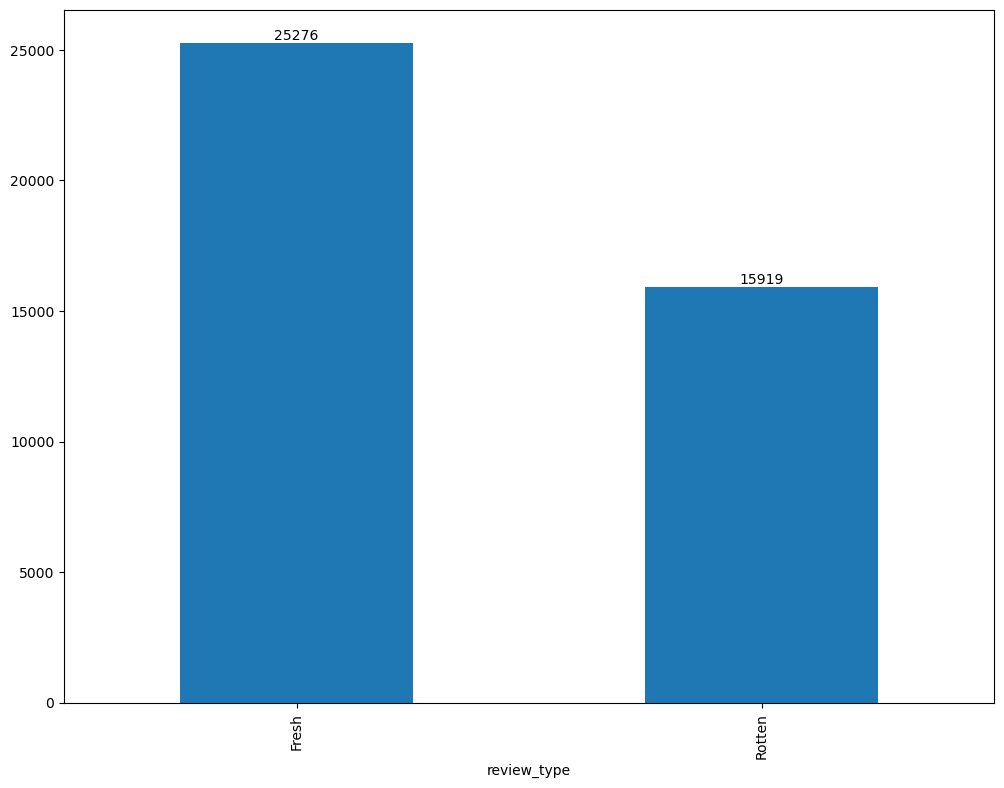

In [109]:
# Plot distribution of the review
ax = df_merged.review_type.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [111]:
# Pick only 5000 entries from the original dataset
df_sub = df_merged[0:5000]

# Encode the label
review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten','Fresh'],[0,1]))

# Build final dataframe
df_feature_critics = pd.concat([df_sub[['review_content']]
                        ,review_type], axis=1).dropna()
df_feature_critics.head()

C:\Users\mouni\AppData\Local\Temp\ipykernel_10480\2289304328.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten','Fresh'],[0,1]))


,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


In [113]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df_feature_critics['review_content'], df_feature_critics['review_type'], test_size=0.2, random_state=42)

## Default Random Forest

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       448
           1       0.72      0.72      0.72       552

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000



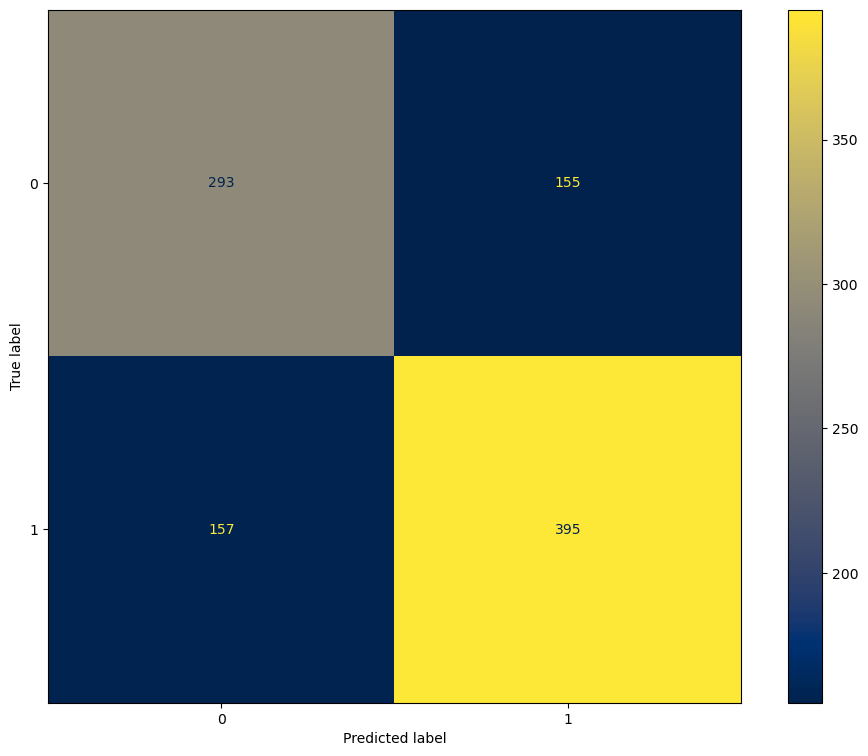

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vectors
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize Random Forest classifier and train it
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf.predict(vectorizer.transform(X_test).toarray())

print(classification_report(y_test, y_predicted))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Create a figure and axis with a custom size
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the confusion matrix
disp.plot(cmap='cividis', ax=ax)

# Show the plot
plt.show()


## Weighted Random Forest

In [133]:
# Calculate class weight
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature_critics.review_type), 
                      y = df_feature_critics.review_type.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 1.058425063505504, 1: 0.9476876421531463}

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.72      0.68       448
           1       0.74      0.67      0.70       552

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000



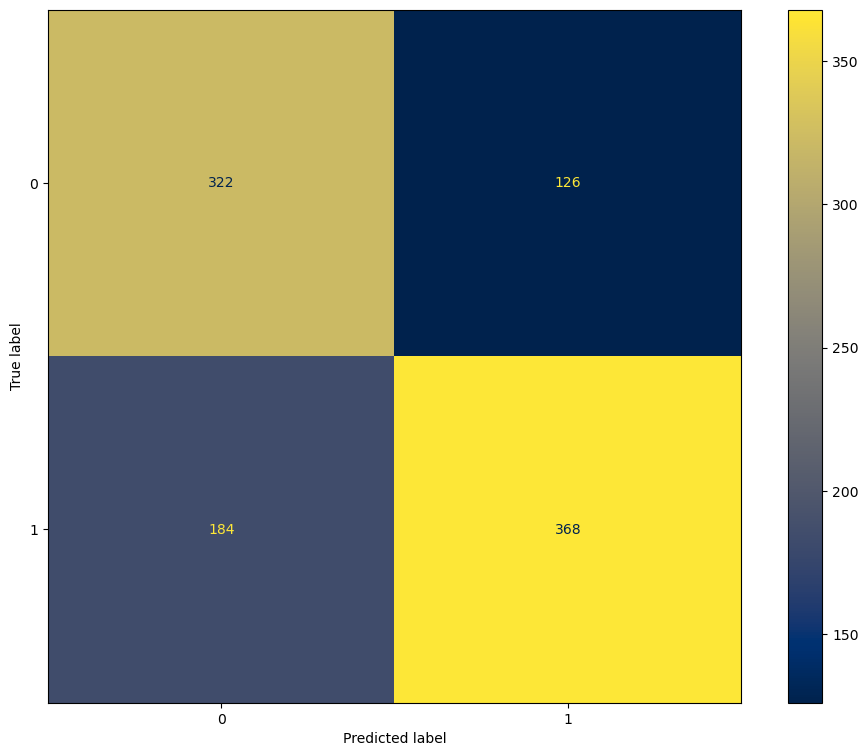

In [160]:
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vectors
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize Random Forest classifier with class weights and train it
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf_weighted.predict(vectorizer.transform(X_test).toarray())

print("Classification Report:\n", classification_report(y_test, y_predicted))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Create a figure and axis with a custom size
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the confusion matrix
disp.plot(cmap='cividis', ax=ax)

# Show the plot
plt.show()


## Movie Status Prediction

In [139]:
# Define a function to predict movie status based on the overall sentiment
def predict_movie_status(prediction):
    """Assign label (Fresh/Rotten) based on prediction"""
    positive_percentage = (prediction == 1).sum()/len(prediction)*100
    
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    
    print(f'Positive review:{positive_percentage:.2f}%')
    print(f'Movie status: {prediction}')

#### 'Body of Lies' Prediction

In [143]:
# Gather all of the reviews of Body of Lies movie
df_bol = df_merged.loc[df_merged['movie_title'] == 'Body of Lies']
df_bol.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
7382,m/10009225-body_of_lies,Body of Lies,DiCaprio (not Crowe) is in top form in Scott's...,Fresh,Rotten
7383,m/10009225-body_of_lies,Body of Lies,Neither the location-based verisimilitude of R...,Rotten,Rotten
7384,m/10009225-body_of_lies,Body of Lies,"DiCaprio gives the role plenty of brio, while ...",Fresh,Rotten
7385,m/10009225-body_of_lies,Body of Lies,"Convincing and gripping, Body of Lies is at th...",Fresh,Rotten
7386,m/10009225-body_of_lies,Body of Lies,Lies and consequences form the heart of this b...,Fresh,Rotten


In [145]:
# Get the prediction
y_predicted_bol = rf_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predicted_bol)

Positive review:50.49%
Movie status: Rotten


In [147]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Body of Lies'].unique()

array(['Rotten'], dtype=object)

#### 'Angel Heart' Prediction

In [150]:
# Gather all of the reviews of Angel Heart movie
df_ah = df_merged.loc[df_merged['movie_title'] == 'Angel Heart']
df_ah.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
9240,m/1000959-angel_heart,Angel Heart,"Angel Heart is a thriller and a horror movie, ...",Fresh,Fresh
9245,m/1000959-angel_heart,Angel Heart,Alan Parker's pulp sensibilities are beautiful...,Fresh,Fresh
9246,m/1000959-angel_heart,Angel Heart,One of the few truly great modern horror films,Fresh,Fresh
9248,m/1000959-angel_heart,Angel Heart,"Erotic, twisty and incredibly disturbed. Splen...",Fresh,Fresh
9249,m/1000959-angel_heart,Angel Heart,Este excepcional noir conta com maravilhosa fo...,Fresh,Fresh


In [152]:
# Get the prediction
y_predicted_ah = rf_weighted.predict(vectorizer.transform(df_ah['review_content']).toarray())
predict_movie_status(y_predicted_ah)

Positive review:61.11%
Movie status: Fresh


In [154]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Angel Heart'].unique()

array(['Fresh'], dtype=object)